<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Aplicación de Algoritmos Genéticos

### Ajuste de curvas con AG

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

### Ejemplo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N=100
x_1=np.linspace(0,10,N)
y_1=10+2*x_1+np.random.normal(loc=0,scale=2,size=(N,))

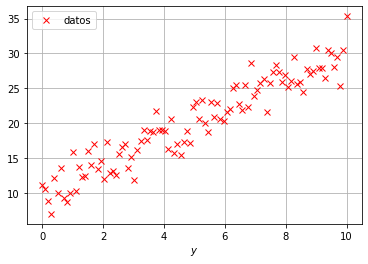

In [4]:
#graficar
plt.figure(figsize=(6,4))
plt.plot(x_1,y_1,'xr', label='datos')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

In [5]:
from scipy import optimize as opt

In [6]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

In [7]:
# Definir funcion objetivo y punto inicial
def min_sqe(beta, x_points, y_points):
    n= len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [8]:
beta_ini = [0,0]

In [9]:
solucion = opt.minimize(fun=min_sqe, x0=beta_ini, args=(x_1,y_1))
solucion

      fun: 2.060853433411679
 hess_inv: array([[ 3.93730594, -0.5863573 ],
       [-0.5863573 ,  0.11665665]])
      jac: array([-1.78813934e-07, -1.07288361e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([9.93345138, 2.0509607 ])

In [10]:
Beta = solucion.x

$$ \hat{f}(x) = 10.12949378 +  1.99068698*x $$

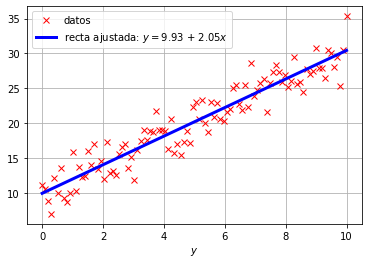

In [12]:
#graficar
plt.figure(figsize=(6,4))
plt.plot(x_1,y_1,'xr', label='datos')

f_hat = Beta[0] + Beta[1]*x_1

plt.plot(x_1, f_hat, 'b', lw=3, label=f'recta ajustada: $y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

In [13]:
# Generar datos
N=100
x=np.linspace(0,1,N)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3,size=(N,))

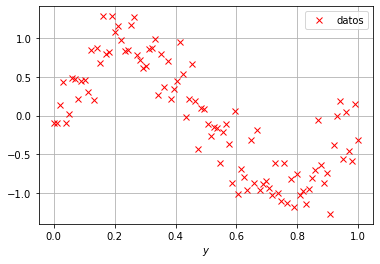

In [14]:
#graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

In [15]:
def min_sq_N(beta, x_points, y_points,N):
    n=len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    sqe_n = (1/(2*n))*((y_points - f_hat_N)**2).sum()
    return sqe_n

In [16]:
solucion_N = opt.minimize(fun=min_sq_N, x0=np.zeros(4), args=(x,y,3))
solucion_N

      fun: 0.03778073862689106
 hess_inv: array([[   14.38816347,  -107.88681936,   215.64553055,  -125.65860096],
       [ -107.88681936,  1104.75448727, -2503.30109845,  1561.01246896],
       [  215.64553055, -2503.30109845,  6053.75152319, -3931.25687465],
       [ -125.65860096,  1561.01246896, -3931.25687465,  2624.70716842]])
      jac: array([4.47966158e-07, 1.72294676e-07, 1.73225999e-07, 1.79745257e-07])
  message: 'Optimization terminated successfully.'
     nfev: 198
      nit: 32
     njev: 33
   status: 0
  success: True
        x: array([ -0.20161646,  10.93550802, -31.64407025,  21.01222782])

In [17]:
Beta_N=solucion_N.x

$$ \hat{f}(x) = -7.35301526e-03 +  1.11776638e+01 x -3.42928942e+01 x^2 + 2.34074407e+01x^3$$

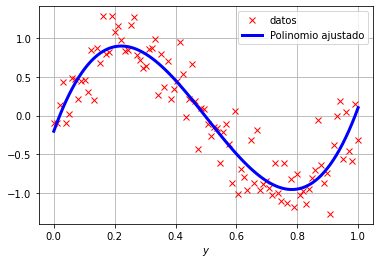

In [18]:
#graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')

f_hat_N = np.array([Beta_N[i]*x**i for i in range(3+1)]).sum(axis=0)
plt.plot(x,f_hat_N, 'b', lw=3, label='Polinomio ajustado')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

### Utilizando AG para ajuste de curvas

In [24]:
def min_sqe(beta, x_points, y_points):
    n= len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def rulette_wheel_selection(p):
    c=np.cumsum(p)
    r=sum(p)*np.random.rand()
    
    ind= np.argwhere(r<=c)
    return ind[0][0]

def crossover(p1,p2):
    c1=copy.deepcopy(p1)
    c2=copy.deepcopy(p2)
    alpha = np.random.uniform(0,1,(c1['position'].shape))
    c1['position']= alpha*p1['position'] + (1-alpha)*p2['position']
    c2['position']= alpha*p2['position'] + (1-alpha)*p1['position']
    return c1, c2

def mutate(c, mu, sigma):
    y = copy.deepcopy(c)
    flag = np.random.rand(*(c['position'].shape)) <= mu
    ind = np.argwhere(flag)
    y['position'][ind] += sigma*np.random.rand(*ind.shape)
    return y

def bounds(c,varmin,varmax):
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)

def sort(arr):
    n=len(arr)
    for i in range(n-1):
        for j in range(0,n-i-1):
            if arr[j]['cost'] > arr[j+1]['cost']:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr


In [26]:
def ga(costfun, x_points, y_points,num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta):
    
    #inicializar la población
    population={}
    for i in range(npop):
        population[i] = {'position': None, 'cost':None} 
    
    bestsol = copy.deepcopy(population)
    bestsol_cost = np.inf
        
    for i in range(npop):
        population[i]['position'] = np.random.uniform(varmin, varmax, num_var)
        population[i]['cost'] = costfun(population[i]['position'],x_points, y_points)
        
        if population[i]['cost'] < bestsol_cost:
            bestsol = copy.deepcopy(population[i])
    
    print('best_sol: {}'.format(bestsol))
    
    bestcost = np.empty(maxit)
    bestsolution = np.empty((maxit,num_var))
    
    for it in range(maxit):
        #calcular las probabilidades de la ruleta
        costs=[]
        for i in range(len(population)):
            costs.append(population[i]['cost'])
        costs = np.array(costs)
        avg_cost = np.mean(costs)

        if avg_cost !=0:
            costs = costs/avg_cost

        props = np.exp(-beta*costs)
        
        for _ in range(num_children//2):
            
            # selección por ruleta
            p1 = population[rulette_wheel_selection(props)]
            p2 = population[rulette_wheel_selection(props)]
            
            # Crossover de los padres
            c1, c2 = crossover(p1,p2)
            
            # Realizar la mutación
            c1=mutate(c1,mu,sigma)
            c2=mutate(c2,mu,sigma)
            
            bounds(c1, varmin, varmax)
            bounds(c2, varmin, varmax)
            
            #evaluar la función de costo
            c1['cost'] = costfun(c1['position'],x_points, y_points)
            c2['cost'] = costfun(c2['position'],x_points, y_points)
            
            if type(bestsol_cost)==float:
                if c1['cost']<bestsol_cost:
                    bestsol_cost = copy.deepcopy(c1)
            else:
                if c1['cost']<bestsol_cost['cost']:
                    bestsol_cost = copy.deepcopy(c1)

            if c2['cost']<bestsol_cost['cost']:
                bestsol_cost = copy.deepcopy(c2)
                
        #juntar la poblacion de la generación anterior con la nueva
        population[len(population)] = c1
        population[len(population)] = c2
        
        population = sort(population)
        
        #almacenar el history
        bestcost[it] = bestsol_cost['cost']
        bestsolution[it] = bestsol_cost['position']
        
        print('iteración {}, best_sol {}, best_cost {}'.format(it,bestsolution[it],bestcost[it]))
        
    out = population
    return (out, bestsolution, bestcost)

best_sol: {'position': array([ 7.48442735, -4.83232431]), 'cost': 882.9947667518707}
iteración 0, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 1, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 2, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 3, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 4, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 5, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 6, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 7, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 8, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 9, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 10, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 11, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 12,

iteración 127, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 128, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 129, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 130, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 131, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 132, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 133, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 134, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 135, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 136, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 137, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 138, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 139, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158

iteración 242, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 243, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 244, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 245, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 246, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 247, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 248, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 249, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 250, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 251, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 252, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 253, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 254, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158

iteración 350, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 351, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 352, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 353, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 354, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 355, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 356, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 357, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 358, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 359, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 360, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 361, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 362, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158

iteración 459, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 460, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 461, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 462, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 463, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 464, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 465, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 466, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 467, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 468, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 469, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 470, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158
iteración 471, best_sol [7.14499383 2.51473796], best_cost 3.085412601884158

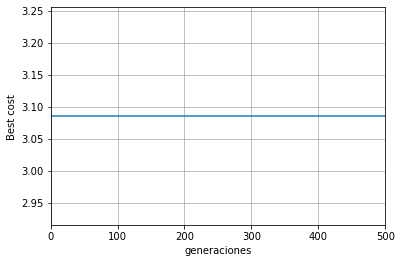

In [28]:
#parámetros
costfunc = min_sqe
num_var =2
varmin=-10
varmax=10

maxit=500
npop=20
beta=1
prop_children=1
num_children = int(np.round(prop_children*npop/2)*2)
mu = 0.2
sigma=0.1

out = ga(costfunc, x_1, y_1, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta)

plt.plot(out[2])
plt.xlim(0,maxit)
plt.xlabel('generaciones')
plt.ylabel('Best cost')
plt.grid()
plt.show()

In [29]:
Beta_ag = out[1][-1]
Beta_ag

array([7.14499383, 2.51473796])

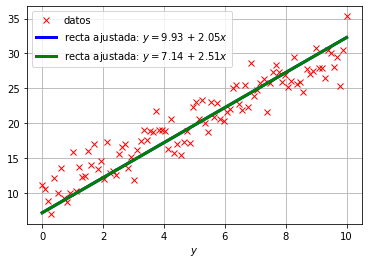

In [31]:
plt.figure(figsize=(6,4))
plt.plot(x_1,y_1,'xr', label='datos')

f_hat_ag = Beta_ag[0] + Beta_ag[1]*x_1

plt.plot(x_1, f_hat, 'b', lw=3, label=f'recta ajustada: $y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$')
plt.plot(x_1, f_hat_ag, 'g', lw=3, label=f'recta ajustada: $y=${np.round(Beta_ag[0],2)} + {np.round(Beta_ag[1],2)}$x$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

### utilizar AG para encontrar el modelo polinomial

In [42]:
def min_sq_N(beta, x_points, y_points,N):
    n=len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    #f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2 + beta[3]*x_points**3
    sqe_n = (1/(2*n))*((y_points - f_hat_N)**2).sum()
    return sqe_n

In [43]:
def ga(costfun, x_points, y_points, N, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta):
    
    #inicializar la población
    population={}
    for i in range(npop):
        population[i] = {'position': None, 'cost':None} 
    
    bestsol = copy.deepcopy(population)
    bestsol_cost = np.inf
        
    for i in range(npop):
        population[i]['position'] = np.random.uniform(varmin, varmax, num_var)
        population[i]['cost'] = costfun(population[i]['position'],x_points, y_points,N)
        
        if population[i]['cost'] < bestsol_cost:
            bestsol = copy.deepcopy(population[i])
    
    print('best_sol: {}'.format(bestsol))
    
    bestcost = np.empty(maxit)
    bestsolution = np.empty((maxit,num_var))
    
    for it in range(maxit):
        #calcular las probabilidades de la ruleta
        costs=[]
        for i in range(len(population)):
            costs.append(population[i]['cost'])
        costs = np.array(costs)
        avg_cost = np.mean(costs)

        if avg_cost !=0:
            costs = costs/avg_cost

        props = np.exp(-beta*costs)
        
        for _ in range(num_children//2):
            
            # selección por ruleta
            p1 = population[rulette_wheel_selection(props)]
            p2 = population[rulette_wheel_selection(props)]
            
            # Crossover de los padres
            c1, c2 = crossover(p1,p2)
            
            # Realizar la mutación
            c1=mutate(c1,mu,sigma)
            c2=mutate(c2,mu,sigma)
            
            bounds(c1, varmin, varmax)
            bounds(c2, varmin, varmax)
            
            #evaluar la función de costo
            c1['cost'] = costfun(c1['position'],x_points, y_points,N)
            c2['cost'] = costfun(c2['position'],x_points, y_points,N)
            
            if type(bestsol_cost)==float:
                if c1['cost']<bestsol_cost:
                    bestsol_cost = copy.deepcopy(c1)
            else:
                if c1['cost']<bestsol_cost['cost']:
                    bestsol_cost = copy.deepcopy(c1)

            if c2['cost']<bestsol_cost['cost']:
                bestsol_cost = copy.deepcopy(c2)
                
        #juntar la poblacion de la generación anterior con la nueva
        population[len(population)] = c1
        population[len(population)] = c2
        
        population = sort(population)
        
        #almacenar el history
        bestcost[it] = bestsol_cost['cost']
        bestsolution[it] = bestsol_cost['position']
        
        print('iteración {}, best_sol {}, best_cost {}'.format(it,bestsolution[it],bestcost[it]))
        
    out = population
    return (out, bestsolution, bestcost)

best_sol: {'position': array([ 4.38379723, -5.63285989, -9.97580823, -9.45221418]), 'cost': 31.769095193901286}
iteración 0, best_sol [-0.75136032  3.34329457 -7.65169923  5.35488286], best_cost 0.3366336973762265
iteración 1, best_sol [-0.75136032  3.34329457 -7.65169923  5.35488286], best_cost 0.3366336973762265
iteración 2, best_sol [-0.75136032  3.34329457 -7.65169923  5.35488286], best_cost 0.3366336973762265
iteración 3, best_sol [-0.75136032  3.34329457 -7.65169923  5.35488286], best_cost 0.3366336973762265
iteración 4, best_sol [-0.75136032  3.34329457 -7.65169923  5.35488286], best_cost 0.3366336973762265
iteración 5, best_sol [-0.75136032  3.34329457 -7.65169923  5.35488286], best_cost 0.3366336973762265
iteración 6, best_sol [-0.75136032  3.34329457 -7.65169923  5.35488286], best_cost 0.3366336973762265
iteración 7, best_sol [-0.75136032  3.34329457 -7.65169923  5.35488286], best_cost 0.3366336973762265
iteración 8, best_sol [-0.75136032  3.34329457 -7.65169923  5.35488286],

iteración 93, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 94, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 95, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 96, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 97, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 98, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 99, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 100, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 101, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 102, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.6035667

iteración 177, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 178, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 179, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 180, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 181, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 182, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 183, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 184, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 185, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 186, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.

iteración 260, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 261, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 262, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 263, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 264, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 265, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 266, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 267, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 268, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 269, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.

iteración 340, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 341, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 342, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 343, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 344, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 345, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 346, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 347, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 348, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 349, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.

iteración 419, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 420, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 421, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 422, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 423, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 424, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 425, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 426, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 427, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.60356671], best_cost 0.1067121998185798
iteración 428, best_sol [ 0.59178598 -0.07836618 -3.68558358  2.

iteración 499, best_sol [ 0.3716235   2.05712769 -6.81621294  3.44428656], best_cost 0.10338053236015504


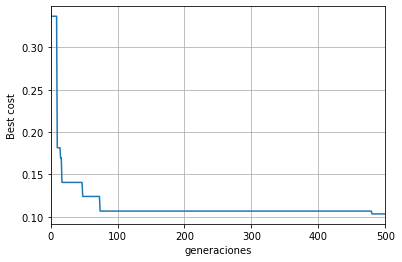

In [44]:
#parámetros
costfunc = min_sq_N
num_var = 4
varmin=-10
varmax=10

maxit=500
npop=20
beta=1
prop_children=1
num_children = int(np.round(prop_children*npop/2)*2)
mu = 0.2
sigma=0.1

out = ga(costfunc, x, y, 3, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta)

plt.plot(out[2])
plt.xlim(0,maxit)
plt.xlabel('generaciones')
plt.ylabel('Best cost')
plt.grid()
plt.show()

In [45]:
Beta_ag_N = out[1][-1]
Beta_ag_N

array([ 0.3716235 ,  2.05712769, -6.81621294,  3.44428656])

In [46]:
Beta_N

array([ -0.20161646,  10.93550802, -31.64407025,  21.01222782])

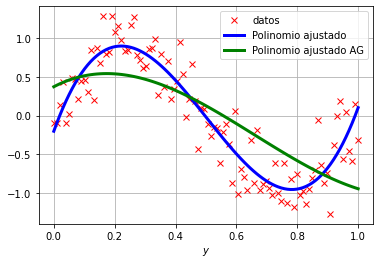

In [48]:
#graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')

f_hat_N = np.array([Beta_N[i]*x**i for i in range(3+1)]).sum(axis=0)
f_hat_N_ag = np.array([Beta_ag_N[i]*x**i for i in range(3+1)]).sum(axis=0)

plt.plot(x,f_hat_N, 'b', lw=3, label='Polinomio ajustado')
plt.plot(x,f_hat_N_ag, 'g', lw=3, label='Polinomio ajustado AG')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()